In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
x_train=train_datagen.flow_from_directory(r'C:\Users\Tanmay sharma\Desktop\ml course material\project_dataset\Training',target_size=(64,64),batch_size=32,class_mode ="categorical")
x_test = test_datagen.flow_from_directory(r'C:\Users\Tanmay sharma\Desktop\ml course material\project_dataset\Testing',target_size=(64,64),batch_size=32,class_mode ="categorical")

Found 11059 images belonging to 23 classes.
Found 2652 images belonging to 23 classes.


In [4]:
print(x_test.class_indices)

{'Clams': 0, 'Corals': 1, 'Crabs': 2, 'Dolphin': 3, 'Eal': 4, 'Fish': 5, 'Jelly Fish': 6, 'Lobster': 7, 'Nudibranchs': 8, 'Octopus': 9, 'Otter': 10, 'Penguin': 11, 'Puffers': 12, 'Sea Rays': 13, 'Sea Urchins': 14, 'Seahorse': 15, 'Seal': 16, 'Sharks': 17, 'Shrimps': 18, 'Squid': 19, 'Starfish': 20, 'Turtle_Tortoise': 21, 'Whale': 22}


In [5]:
#model building
#1. initializing the model
model = Sequential()
#2. now we add different layers to the model 

In [6]:
#a. adding the convolution layer-(no.of filters, size of filters , input shape , activation = relu)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))
#input shape is 64,64,3 because it is rgb , if greyscale image then 64,64,1

In [7]:
#b. most prominent features being extracted - maxpooling 

model.add(MaxPooling2D(pool_size=(2,2)))

In [8]:
#c. adding the flatten layer to provide it as input for ann
model.add(Flatten())

In [9]:
#now hidden layer of ann as input layer already done\

model.add(Dense(units=128,activation="relu"))

In [10]:
#output layer

model.add(Dense(units=23,activation="softmax"))

In [11]:
#compiling the model 
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")


In [13]:
model.fit(x_train,epochs=10,validation_data=x_test,validation_steps=10)

Epoch 1/10
346/346 [==============================] - 80s 227ms/step - loss: 2.5479 - accuracy: 0.2516 - val_loss: 2.2652 - val_accuracy: 0.3187
Epoch 2/10
346/346 [==============================] - 68s 197ms/step - loss: 2.1832 - accuracy: 0.3419 - val_loss: 2.2487 - val_accuracy: 0.3562
Epoch 3/10
346/346 [==============================] - 67s 194ms/step - loss: 1.9777 - accuracy: 0.4056 - val_loss: 2.0206 - val_accuracy: 0.3875
Epoch 4/10
346/346 [==============================] - 68s 195ms/step - loss: 1.7909 - accuracy: 0.4589 - val_loss: 2.1182 - val_accuracy: 0.4062
Epoch 5/10
346/346 [==============================] - 68s 196ms/step - loss: 1.6122 - accuracy: 0.5133 - val_loss: 2.2338 - val_accuracy: 0.3562
Epoch 6/10
346/346 [==============================] - 66s 190ms/step - loss: 1.4438 - accuracy: 0.5687 - val_loss: 2.2711 - val_accuracy: 0.3406
Epoch 7/10
346/346 [==============================] - 66s 191ms/step - loss: 1.2695 - accuracy: 0.6235 - val_loss: 1.9708 - val_ac

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 23)                2967      
                                                                 
Total params: 3940247 (15.03 MB)
Trainable params: 3940247 (15.03 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [15]:
model.save("seanimal.h5")

C:\ANACONDA\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
#testing the model
import tensorflow as tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np


In [17]:
model = tensorflow.keras.models.load_model(r"C:\DL\PROJECT_seamarine\seanimal.h5",compile=False)

In [18]:
img=image.load_img(r"C:\Users\Tanmay sharma\Desktop\ml course material\project_dataset\Testing\Turtle_Tortoise\Turtle_Tortoise (3).png",target_size=(64,64))
#we give target sizee as we traiend the model in 64,64 size

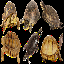

In [19]:
img

In [20]:
#now the model wouldnt understand if we simply give it the img so we convert it to an array
arr = image.img_to_array(img)
arr

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       ...,

       [[  0.,   0.,   0.],
        [179., 131.,  63.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,  

In [21]:
#as there is 3x3 format , we have a 3d image -> rgb 
#now we convert 3d to 4d 

arr =np.expand_dims(arr,axis=0)

In [22]:
arr.ndim

4

In [23]:
arr.shape
#(batch size,image length , breath , height) not in particular order
#batch size is 1 -> even though we used 32 for batch size cuz thats only one image

(1, 64, 64, 3)

In [24]:
pred=model.predict(arr)

1/1 [==============================] - 0s 184ms/step


In [25]:
pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
#so image being of class with 1 is high
#to check which class it blongss to
print(x_train.class_indices)

{'Clams': 0, 'Corals': 1, 'Crabs': 2, 'Dolphin': 3, 'Eel': 4, 'Fish': 5, 'Jelly Fish': 6, 'Lobster': 7, 'Nudibranchs': 8, 'Octopus': 9, 'Otter': 10, 'Penguin': 11, 'Puffers': 12, 'Sea Rays': 13, 'Sea Urchins': 14, 'Seahorse': 15, 'Seal': 16, 'Sharks': 17, 'Shrimps': 18, 'Squid': 19, 'Starfish': 20, 'Turtle_Tortoise': 21, 'Whale': 22}


In [27]:
#as we can se the image belongs to class elephants

pred_class=np.argmax(pred,axis=1)
pred_class
#maximum value is at array index 2 

array([8], dtype=int64)

In [28]:
pred_class[0]

8

In [31]:
index=["Clams","Corals","Crabs","Dolphin","Eel","Fish","Jelly Fish","Lobster","Nudibranchs","Octopus","Otter","Penguin","Puffers","Sea Rays","Sea Urchins","Seahorse","Seal","Sharks","Shrimps","Squid","Starfish","Turtle_Tortoise","Whale"]
result=str(index[pred_class[0]])
result

'Nudibranchs'